In [1]:
# Importing labraries


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import PIL
import PIL.Image
import tensorflow as tf
import pathlib
import cv2
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator as IMG
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras import layers, losses


import warnings
warnings.filterwarnings('ignore') #to ignore warning

In [52]:
# loading the labels
df = pd.read_csv('Desktop\images\img\label.csv')

#Defining the labels and taking each contents of the column names
labels = df[['First name ', 'Second Name', 'Last name ', 'Gender',
       'Date of birth ', 'Institution ', 'Course of study ', 'Level', 'Email ',
       'Phone number ']].values


#Defining the paths of the train, validation and test directories
train_dir = 'Desktop/images/img/train'
val_dir = 'Desktop/images/img/validation'
test_dir =  'Desktop/images/img/test'

In [2]:
# Building augmentation pipeline 
image_gen_train = IMG(
                        rescale=1./255,
                        rotation_range = 7,
#                         width_shift_range = 0.2,
#                         height_shift_range = 0.2,
                        zoom_range = 0.2,
                        #horizontal_flip = True,
                        #vertical_flip = True,
                        fill_mode = "nearest"

                            )

In [3]:
input_dir = 'Desktop/faces/Validation'
output_dir = 'Desktop/faces/Validation'

#Loop through all the subdirectories in the input directory
for sub_dir in os.listdir(input_dir):
    
    #Create a subdirectory in the output directory with thesame name
    os.makedirs(os.path.join(output_dir, sub_dir), exist_ok = True)
    
    #Load through images from the input directory
    img_dir = os.path.join(input_dir, sub_dir)
    img_list = os.listdir(img_dir)
    
    #Loop through all the images in the subdirectory
    for img_file in img_list:
        
        #Load the image
        img_path = os.path.join(img_dir, img_file)
        img = load_img(img_path)
        
        #Convert the images to a numpy array
        x = img_to_array(img)
        x = x.reshape((1,) + x.shape)
        
        #Generate the augmented images and save them in the output directory
        
        i = 0
        for batch in image_gen_train.flow(x, batch_size = 1, 
                                  save_to_dir = os.path.join(output_dir, sub_dir), 
                                  save_prefix = 'aug', save_format = 'jpg'): 
            i += 1
            
            if i >= 5: # Generate 10 augmented images for each original image
                break
                
print(' augmentation finish')                

 augmentation finish


In [90]:
#Definig the rescaling piprline
datagen = IMG(
            rotation_range=45,
#             width_shift_range=0.2,
#             height_shift_range=0.2,
            shear_range=0.2,
            zoom_range=0.57,
            horizontal_flip=True,
            fill_mode='nearest')

In [91]:
#prepairing the image data


batch_size = 32
img_height = 255
img_width = 255

#rescaling the trainset
train_data = datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size = batch_size,
    class_mode = "binary")


#rescaling the validation set
validation_data = datagen.flow_from_directory(
    val_dir,
    target_size=(img_width, img_height),
    batch_size = batch_size,
    class_mode = "binary"   )


Found 4132 images belonging to 10 classes.
Found 316 images belonging to 10 classes.


In [92]:
print(len(validation_data.class_indices))

10


In [95]:
validation_data.class_indices

{'Abubakar Al-amin': 0,
 'Aliyu Alkasim': 1,
 'Fatima Kabir': 2,
 'Maryam Al-amin': 3,
 'Nuwairah Al-amin': 4,
 'Recheal Abubakar': 5,
 'Sadiq Gambo': 6,
 'Salim Bello': 7,
 'Shuaibu Pira': 8,
 'khaulat Al-amin': 9}

In [94]:
train_data.class_indices

{'Abubakar Al-amin': 0,
 'Aliyu Alkasim': 1,
 'Fatima Kabir': 2,
 'Khaulat Al-amin': 3,
 'Maryam Al-amin': 4,
 'Nuwairah Al-amin': 5,
 'Recheal Abubakar': 6,
 'Sadiq Gambo': 7,
 'Salim Bello': 8,
 'Shuaibu Pira': 9}

In [13]:
num_classes = len(train_data)

In [14]:
#Building model


model = keras.Sequential([
    keras.layers.Rescaling(1./255),            
    keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (255,255,3)),
    keras.layers.MaxPooling2D((2,2), strides = 2),
    keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    keras.layers.MaxPooling2D((2,2), strides = 2),
    keras.layers.Conv2D(128, (3,3), activation = 'relu'),
    keras.layers.MaxPooling2D((2,2), strides = 2),
    keras.layers.Conv2D(256, (3,3), activation = 'relu'),
    keras.layers.MaxPooling2D((2,2), strides = 2),
    keras.layers.Flatten(),
    keras.layers.Dense(512,  activation = 'relu'),
    keras.layers.Dense(num_classes, activation = 'softmax')
])

In [15]:
#Compile model
#osses.SparseCategoricalCrossentropy()
model.compile(loss = losses.SparseCategoricalCrossentropy(),
             optimizer = 'adam',
             metrics= ['accuracy'])

In [16]:
#Training the model

history = model.fit(train_data, validation_data = validation_data, batch_size = 32,

          epochs = 15)
print('training finish')

Epoch 1/15
130/130 [==============================] - 3569s 27s/step - loss: 1.5332 - accuracy: 0.4661 - val_loss: 2.1798 - val_accuracy: 0.5300
Epoch 2/15
130/130 [==============================] - 4097s 31s/step - loss: 0.7422 - accuracy: 0.7277 - val_loss: 2.2445 - val_accuracy: 0.6120
Epoch 3/15
130/130 [==============================] - 15091s 117s/step - loss: 0.4183 - accuracy: 0.8526 - val_loss: 1.9872 - val_accuracy: 0.7224
Epoch 4/15
130/130 [==============================] - 3844s 30s/step - loss: 0.3445 - accuracy: 0.8826 - val_loss: 2.0914 - val_accuracy: 0.7350
Epoch 5/15
130/130 [==============================] - 4043s 31s/step - loss: 0.2585 - accuracy: 0.9167 - val_loss: 2.6748 - val_accuracy: 0.7098
Epoch 6/15
130/130 [==============================] - 7875s 27s/step - loss: 0.2034 - accuracy: 0.9310 - val_loss: 1.4311 - val_accuracy: 0.7603
Epoch 7/15
130/130 [==============================] - 4068s 31s/step - loss: 0.1703 - accuracy: 0.9439 - val_loss: 2.0310 - val_

In [17]:
model.save('my_model_2')

INFO:tensorflow:Assets written to: my_model_2\assets


INFO:tensorflow:Assets written to: my_model_2\assets


In [ ]:
print('training finish')

In [ ]:
new_model = tf.keras.models.load_model('my_model')
new_model.summary()

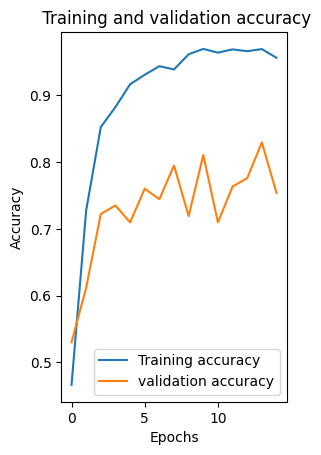

In [30]:
history = model.history
acc  = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epoch = range(15)

# plt.figure(figsize = (5,5))
plt.subplot(1,2,1)
plt.plot(epoch, acc, label="Training accuracy")
plt.plot(epoch, val_acc, label="validation accuracy")
plt.legend(loc = 'lower right')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title(" Training and validation accuracy")

plt.show();




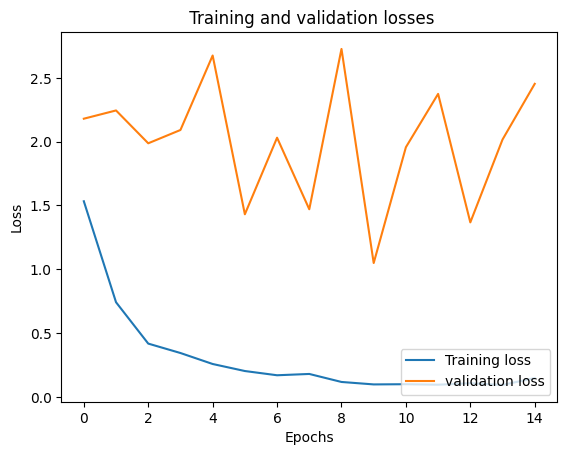

In [29]:
plt.plot(epoch, loss, label="Training loss")
plt.plot(epoch, val_loss, label="validation loss")
plt.legend(loc = 'lower right')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title(" Training and validation losses")
plt.show();




In [31]:
#Define the labels function
def label_s(n):

        print('FIRST NAME :', labels[n][0],'\n' )
        print('SECOND NAME :',labels[n][1],'\n')
        print('LAST NAME :',labels[n][2],'\n')
        print('GENDER :',labels[n][3],'\n')
        print('DATE OF BIRTH:', labels[n][4],'\n')
        print('INSTITIUDE :',labels[n][5],'\n')
        print('COURSE OF STUDY :',labels[n][6],'\n')
        print('LEVEL :',labels[n][7],'\n')      
        print('EMAIL :',labels[n][8],'\n')  
        print('PHONE NUMBER :0',labels[n][9],'\n')      

In [41]:
label_s(4)

FIRST NAME : Marryam 

SECOND NAME : Abubakar  

LAST NAME : Al-Amin 

GENDER : Female 

DATE OF BIRTH: 5/10/2004 

INSTITIUDE : Newgate college 

COURSE OF STUDY : Medical laboratory technician 

LEVEL : 200 

EMAIL : abubakarmarryamalamin@gmail.com 

PHONE NUMBER :0 7069035483 



In [34]:

#Building the prediction function
def predict(dir_path):
    
    # Loading each image in the test directory and resizing them to an equal size
    for i in os.listdir(dir_path):
        img = image.load_img(dir_path+'//'+ i, target_size = (255,255,3))
        
        
        #Plotting the images and Setting the output size of each image
        plt.figure(figsize=(2,2))
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(img)
        plt.show();
        
        
        #Converting each images into a numpy array and expanding there dimension
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis = 0)
        images = x
    
        #putting labels to each of the predicted images
        predict = model.predict(images)
        predict = np.argmax(predict)
        if predict == 0:
            print(label_s(8))
        elif predict == 1:
            print(label_s(9))
        elif predict == 2:
            print(label_s(0))
        elif predict == 3:
            print(label_s(1))    
        elif predict == 4:
            print(label_s(2)) 
            
        elif predict == 5:
            print(label_s(3))
            
        elif predict == 6:
            print(label_s(4))
            
            
        elif predict == 7:
            print(label_s(5)) 
            
        elif predict == 8:
            print(label_s(6))  
            
         
              
        else:
            print(label_s(7))
    
    

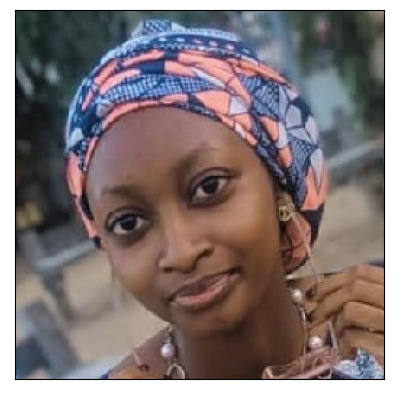

1/1 [==============================] - 1s 588ms/step
1


In [47]:
img = 'Desktop/10.3.jpg'
img = image.load_img(img, target_size = (255,255,3))

plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(img)
plt.show();
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)
images = x
predict = model.predict(images)
predict = np.argmax(predict)
print(predict)

In [46]:
label_s(1)

FIRST NAME : Nuwairat 

SECOND NAME : Abubakar  

LAST NAME : Al-Amin 

GENDER : Female 

DATE OF BIRTH: 5/10/2023 

INSTITIUDE : Newgate college 

COURSE OF STUDY : Medical laboratory technician 

LEVEL : 100 

EMAIL : abubakarnuwairatalamin@gmail.com 

PHONE NUMBER :0 8098927096 



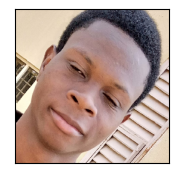

1/1 [==============================] - 1s 1s/step
FIRST NAME : Abubakar  

SECOND NAME : Abubakar  

LAST NAME : Al-amin  

GENDER : Male 

DATE OF BIRTH: 1/4/2002 

INSTITIUDE : Gombe State University  

COURSE OF STUDY : Statistics  

LEVEL : 300 

EMAIL : abubakaralamin100@gmail.com 

PHONE NUMBER :0 8065436818 

None


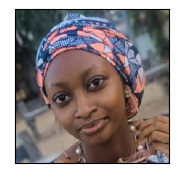

1/1 [==============================] - 1s 705ms/step
FIRST NAME : Suhaibu 

SECOND NAME : S 

LAST NAME : pira 

GENDER : Male 

DATE OF BIRTH: 19/10/1900 

INSTITIUDE : GSU 

COURSE OF STUDY : Statistics  

LEVEL : 300 

EMAIL : Piraaaa 

PHONE NUMBER :0 402656665 

None


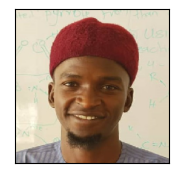

1/1 [==============================] - 1s 688ms/step
FIRST NAME : Nuwairat 

SECOND NAME : Abubakar  

LAST NAME : Al-Amin 

GENDER : Female 

DATE OF BIRTH: 5/10/2023 

INSTITIUDE : Newgate college 

COURSE OF STUDY : Medical laboratory technician 

LEVEL : 100 

EMAIL : abubakarnuwairatalamin@gmail.com 

PHONE NUMBER :0 8098927096 

None


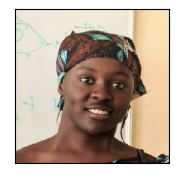

1/1 [==============================] - 1s 914ms/step
FIRST NAME : Aliyu 

SECOND NAME : Alkasim 

LAST NAME : Haruna 

GENDER : Male 

DATE OF BIRTH: 19/19/1919 

INSTITIUDE : uj 

COURSE OF STUDY : crimes 

LEVEL : 1 

EMAIL : abbbaaa 

PHONE NUMBER :0 0704489+4+ 

None


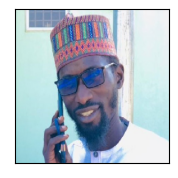

1/1 [==============================] - 1s 543ms/step
FIRST NAME : Suhaibu 

SECOND NAME : S 

LAST NAME : pira 

GENDER : Male 

DATE OF BIRTH: 19/10/1900 

INSTITIUDE : GSU 

COURSE OF STUDY : Statistics  

LEVEL : 300 

EMAIL : Piraaaa 

PHONE NUMBER :0 402656665 

None


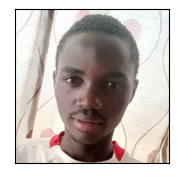

1/1 [==============================] - 1s 577ms/step
FIRST NAME : Aliyu 

SECOND NAME : Alkasim 

LAST NAME : Haruna 

GENDER : Male 

DATE OF BIRTH: 19/19/1919 

INSTITIUDE : uj 

COURSE OF STUDY : crimes 

LEVEL : 1 

EMAIL : abbbaaa 

PHONE NUMBER :0 0704489+4+ 

None


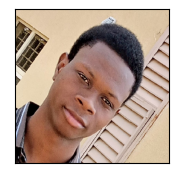

1/1 [==============================] - 1s 878ms/step
FIRST NAME : Abubakar  

SECOND NAME : Abubakar  

LAST NAME : Al-amin  

GENDER : Male 

DATE OF BIRTH: 1/4/2002 

INSTITIUDE : Gombe State University  

COURSE OF STUDY : Statistics  

LEVEL : 300 

EMAIL : abubakaralamin100@gmail.com 

PHONE NUMBER :0 8065436818 

None


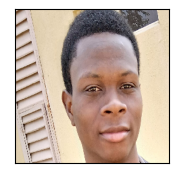

1/1 [==============================] - 1s 700ms/step
FIRST NAME : Abubakar  

SECOND NAME : Abubakar  

LAST NAME : Al-amin  

GENDER : Male 

DATE OF BIRTH: 1/4/2002 

INSTITIUDE : Gombe State University  

COURSE OF STUDY : Statistics  

LEVEL : 300 

EMAIL : abubakaralamin100@gmail.com 

PHONE NUMBER :0 8065436818 

None


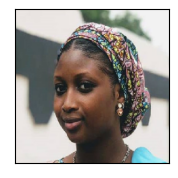

1/1 [==============================] - 1s 712ms/step
FIRST NAME : Suhaibu 

SECOND NAME : S 

LAST NAME : pira 

GENDER : Male 

DATE OF BIRTH: 19/10/1900 

INSTITIUDE : GSU 

COURSE OF STUDY : Statistics  

LEVEL : 300 

EMAIL : Piraaaa 

PHONE NUMBER :0 402656665 

None


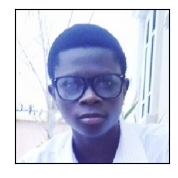

1/1 [==============================] - 1s 712ms/step
FIRST NAME : Salim 

SECOND NAME : Bello 

LAST NAME : Muhammad 

GENDER : Male 

DATE OF BIRTH: 1/9/2000 

INSTITIUDE : Gombe state University 

COURSE OF STUDY : Computer science 

LEVEL : 300 

EMAIL : Saleemyoungarmy3@gmail.com 

PHONE NUMBER :0 8031232701 

None


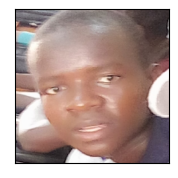

1/1 [==============================] - 1s 747ms/step
FIRST NAME : Marryam 

SECOND NAME : Abubakar  

LAST NAME : Al-Amin 

GENDER : Female 

DATE OF BIRTH: 5/10/2004 

INSTITIUDE : Newgate college 

COURSE OF STUDY : Medical laboratory technician 

LEVEL : 200 

EMAIL : abubakarmarryamalamin@gmail.com 

PHONE NUMBER :0 7069035483 

None


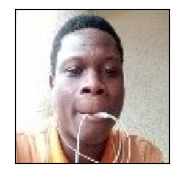

1/1 [==============================] - 1s 642ms/step
FIRST NAME : Abubakar  

SECOND NAME : Abubakar  

LAST NAME : Al-amin  

GENDER : Male 

DATE OF BIRTH: 1/4/2002 

INSTITIUDE : Gombe State University  

COURSE OF STUDY : Statistics  

LEVEL : 300 

EMAIL : abubakaralamin100@gmail.com 

PHONE NUMBER :0 8065436818 

None


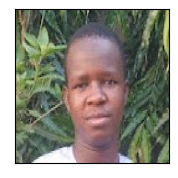

1/1 [==============================] - 1s 700ms/step
FIRST NAME : Suhaibu 

SECOND NAME : S 

LAST NAME : pira 

GENDER : Male 

DATE OF BIRTH: 19/10/1900 

INSTITIUDE : GSU 

COURSE OF STUDY : Statistics  

LEVEL : 300 

EMAIL : Piraaaa 

PHONE NUMBER :0 402656665 

None


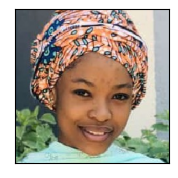

1/1 [==============================] - 1s 798ms/step
FIRST NAME : Khaulat 

SECOND NAME : Abubakar  

LAST NAME : Al- amin 

GENDER : Female 

DATE OF BIRTH: 1/2/2005 

INSTITIUDE : hill creast 

COURSE OF STUDY : Sec 

LEVEL : 3 

EMAIL : khaulatalamin 

PHONE NUMBER :0 802891366 

None


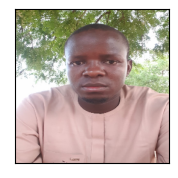

1/1 [==============================] - 1s 664ms/step
FIRST NAME : Salim 

SECOND NAME : Bello 

LAST NAME : Muhammad 

GENDER : Male 

DATE OF BIRTH: 1/9/2000 

INSTITIUDE : Gombe state University 

COURSE OF STUDY : Computer science 

LEVEL : 300 

EMAIL : Saleemyoungarmy3@gmail.com 

PHONE NUMBER :0 8031232701 

None


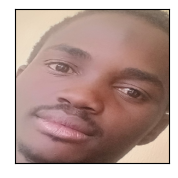

1/1 [==============================] - 1s 674ms/step
FIRST NAME : Aliyu 

SECOND NAME : Alkasim 

LAST NAME : Haruna 

GENDER : Male 

DATE OF BIRTH: 19/19/1919 

INSTITIUDE : uj 

COURSE OF STUDY : crimes 

LEVEL : 1 

EMAIL : abbbaaa 

PHONE NUMBER :0 0704489+4+ 

None


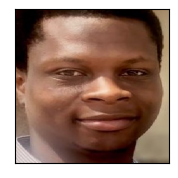

1/1 [==============================] - 1s 765ms/step
FIRST NAME : Abubakar  

SECOND NAME : Abubakar  

LAST NAME : Al-amin  

GENDER : Male 

DATE OF BIRTH: 1/4/2002 

INSTITIUDE : Gombe State University  

COURSE OF STUDY : Statistics  

LEVEL : 300 

EMAIL : abubakaralamin100@gmail.com 

PHONE NUMBER :0 8065436818 

None


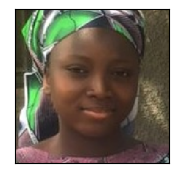

1/1 [==============================] - 1s 779ms/step
FIRST NAME : Khaulat 

SECOND NAME : Abubakar  

LAST NAME : Al- amin 

GENDER : Female 

DATE OF BIRTH: 1/2/2005 

INSTITIUDE : hill creast 

COURSE OF STUDY : Sec 

LEVEL : 3 

EMAIL : khaulatalamin 

PHONE NUMBER :0 802891366 

None


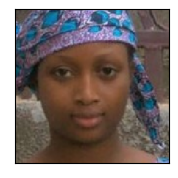

1/1 [==============================] - 1s 692ms/step
FIRST NAME : Abubakar  

SECOND NAME : Abubakar  

LAST NAME : Al-amin  

GENDER : Male 

DATE OF BIRTH: 1/4/2002 

INSTITIUDE : Gombe State University  

COURSE OF STUDY : Statistics  

LEVEL : 300 

EMAIL : abubakaralamin100@gmail.com 

PHONE NUMBER :0 8065436818 

None


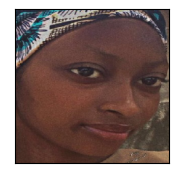

1/1 [==============================] - 1s 652ms/step
FIRST NAME : Khaulat 

SECOND NAME : Abubakar  

LAST NAME : Al- amin 

GENDER : Female 

DATE OF BIRTH: 1/2/2005 

INSTITIUDE : hill creast 

COURSE OF STUDY : Sec 

LEVEL : 3 

EMAIL : khaulatalamin 

PHONE NUMBER :0 802891366 

None


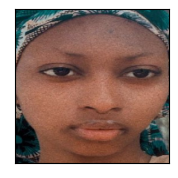

1/1 [==============================] - 1s 739ms/step
FIRST NAME : Marryam 

SECOND NAME : Abubakar  

LAST NAME : Al-Amin 

GENDER : Female 

DATE OF BIRTH: 5/10/2004 

INSTITIUDE : Newgate college 

COURSE OF STUDY : Medical laboratory technician 

LEVEL : 200 

EMAIL : abubakarmarryamalamin@gmail.com 

PHONE NUMBER :0 7069035483 

None


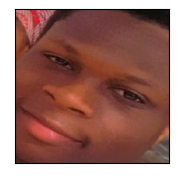

1/1 [==============================] - 1s 706ms/step
FIRST NAME : Nuwairat 

SECOND NAME : Abubakar  

LAST NAME : Al-Amin 

GENDER : Female 

DATE OF BIRTH: 5/10/2023 

INSTITIUDE : Newgate college 

COURSE OF STUDY : Medical laboratory technician 

LEVEL : 100 

EMAIL : abubakarnuwairatalamin@gmail.com 

PHONE NUMBER :0 8098927096 

None


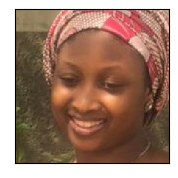

1/1 [==============================] - 1s 758ms/step
FIRST NAME : Sadiq 

SECOND NAME : Abubakar 

LAST NAME : Gambo 

GENDER : Male 

DATE OF BIRTH: 23/05/2007 

INSTITIUDE : GSU 

COURSE OF STUDY : Statistics  

LEVEL : 300 

EMAIL : fateemakabeer403@gmail.com 

PHONE NUMBER :0 7066318666 

None


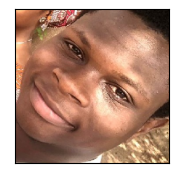

1/1 [==============================] - 1s 661ms/step
FIRST NAME : Marryam 

SECOND NAME : Abubakar  

LAST NAME : Al-Amin 

GENDER : Female 

DATE OF BIRTH: 5/10/2004 

INSTITIUDE : Newgate college 

COURSE OF STUDY : Medical laboratory technician 

LEVEL : 200 

EMAIL : abubakarmarryamalamin@gmail.com 

PHONE NUMBER :0 7069035483 

None


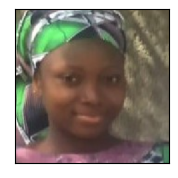

1/1 [==============================] - 1s 539ms/step
FIRST NAME : Khaulat 

SECOND NAME : Abubakar  

LAST NAME : Al- amin 

GENDER : Female 

DATE OF BIRTH: 1/2/2005 

INSTITIUDE : hill creast 

COURSE OF STUDY : Sec 

LEVEL : 3 

EMAIL : khaulatalamin 

PHONE NUMBER :0 802891366 

None


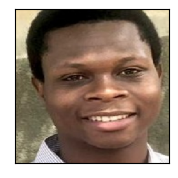

1/1 [==============================] - 1s 553ms/step
FIRST NAME : Suhaibu 

SECOND NAME : S 

LAST NAME : pira 

GENDER : Male 

DATE OF BIRTH: 19/10/1900 

INSTITIUDE : GSU 

COURSE OF STUDY : Statistics  

LEVEL : 300 

EMAIL : Piraaaa 

PHONE NUMBER :0 402656665 

None


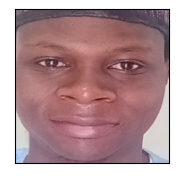

1/1 [==============================] - 1s 637ms/step
FIRST NAME : Aliyu 

SECOND NAME : Alkasim 

LAST NAME : Haruna 

GENDER : Male 

DATE OF BIRTH: 19/19/1919 

INSTITIUDE : uj 

COURSE OF STUDY : crimes 

LEVEL : 1 

EMAIL : abbbaaa 

PHONE NUMBER :0 0704489+4+ 

None


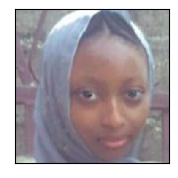

1/1 [==============================] - 1s 535ms/step
FIRST NAME : Abubakar  

SECOND NAME : Abubakar  

LAST NAME : Al-amin  

GENDER : Male 

DATE OF BIRTH: 1/4/2002 

INSTITIUDE : Gombe State University  

COURSE OF STUDY : Statistics  

LEVEL : 300 

EMAIL : abubakaralamin100@gmail.com 

PHONE NUMBER :0 8065436818 

None


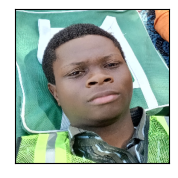

1/1 [==============================] - 0s 491ms/step
FIRST NAME : Suhaibu 

SECOND NAME : S 

LAST NAME : pira 

GENDER : Male 

DATE OF BIRTH: 19/10/1900 

INSTITIUDE : GSU 

COURSE OF STUDY : Statistics  

LEVEL : 300 

EMAIL : Piraaaa 

PHONE NUMBER :0 402656665 

None


In [35]:
predict(test_dir)

In [24]:
model.save('Desktop/images/img/my_model_1.h5')

In [25]:
img = 'Desktop/1.jpg'

In [26]:
 
    
def img(imag):
        img = image.load_img(imag, target_size = (200,200,3))
        
        
        #Plotting the images and Setting the output size of each image
        plt.figure(figsize=(2,2))
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(img)
        plt.show();
        
        
        #Converting each images into a numpy array and expanding there dimension
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis = 0)
        images = x
    
        #putting labels to each of the predicted images
        predict = model.predict(images)
        predict = np.argmax(predict)
        if predict == 0:
            print(label_s(8))
        elif predict == 1:
            print(label_s(9))
        elif predict == 2:
            print(label_s(10))
        elif predict == 3:
            print(label_s(11))    
        elif predict == 4:
            print(label_s(12)) 
            
        elif predict == 5:
            print(label_s(0))
            
        elif predict == 8:
            print(label_s(3))
            
            
        elif predict == 9:
            print(label_s(4)) 
            
        elif predict == 10:
            print(label_s(5))  
            
        elif predict == 11:
            print(label_s(6))
            
            
        elif predict == 12:
            print(label_s(7)) 
#         else if predict == 11:
#             print(label_s[5])     
              
        else:
            print(label_s(1))
    
    

In [100]:
img = image.load_img('Desktop/3.jpg', target_size = (200,200,3))

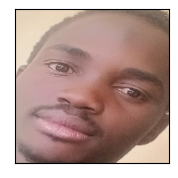

1/1 [==============================] - 0s 462ms/step
FIRST NAME : Hafsat 

SECOND NAME : Nasiru 

LAST NAME : Garba 

GENDER : Female 

DATE OF BIRTH: 1/15/2002 

INSTITIUDE : High institution 

COURSE OF STUDY : Public health 

LEVEL : 200level 

EMAIL : hafsatnasiru371@gmail.com 

PHONE NUMBER :0 9137071079 

None


In [101]:
plt.figure(figsize=(2,2))
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(img)
plt.show();
        
        
        #Converting each images into a numpy array and expanding there dimension
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)
images = x
    
        #putting labels to each of the predicted images
predict = model.predict(images)
predict = np.argmax(predict)
if predict == 0:
    print(label_s(8))
elif predict == 1:
    print(label_s(9))
elif predict == 2:
      print(label_s(10))
elif predict == 3:
     print(label_s(11))    
elif predict == 4:
     print(label_s(12)) 
            
elif predict == 5:
     print(label_s(0))
            
elif predict == 8:
     print(label_s(3))
            
            
elif predict == 9:
     print(label_s(4)) 
            
elif predict == 10:
     print(label_s(5))  
            
elif predict == 11:
     print(label_s(6))
            
            
elif predict == 12:
     print(label_s(7)) 
#         else if predict == 11:
#             print(label_s[5])     
              
else:
    print(label_s(1))
    
    

In [83]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [84]:
man = (probability_model.predict(images))

1/1 [==============================] - 1s 836ms/step


In [85]:
100*np.max(man[0])

1.1459680274128914

In [8]:
model_2 = tf.keras.models.load_model('my_model_2')

In [84]:
labels[0]

array(['Abubakar ', 'Abubakar ', 'Al-amin ', 'Male', '1/4/2002',
       'Gombe State University ', 'Statistics ', '300',
       'abubakaralamin100@gmail.com', '8065436818'], dtype=object)

In [78]:
series = (labels.take(4,axis=0))
pd.Series(series)

0                            Marryam
1                          Abubakar 
2                            Al-Amin
3                             Female
4                          5/10/2004
5                    Newgate college
6      Medical laboratory technician
7                                200
8    abubakarmarryamalamin@gmail.com
9                         7069035483
dtype: object

In [74]:
def label(n):
    
    for j in labels.take(n ,axis=0):
         return j
    

In [75]:
label(4)

'Marryam'

In [97]:
def predict_image(input_dir, target_size, model):
    for i in os.listdir(input_dir):
        
        img = image.load_img(input_dir + '//' + i, target_size = target_size)
        
        
        plt.figure(figsize=(2,2))
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(img)
        plt.show();
        
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis = 0)
        images = x
    
        #putting labels to each of the predicted images
        predict = model.predict(images)
        predict = np.argmax(predict)
        print(labels[predict])

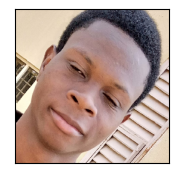

1/1 [==============================] - 1s 605ms/step
2


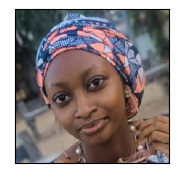

1/1 [==============================] - 1s 581ms/step
1


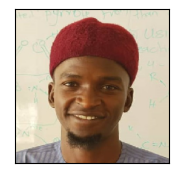

1/1 [==============================] - 1s 586ms/step
3


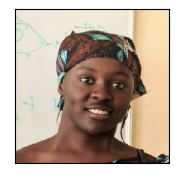

1/1 [==============================] - 1s 594ms/step
0


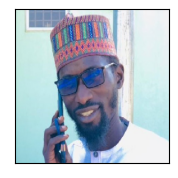

1/1 [==============================] - 1s 635ms/step
1


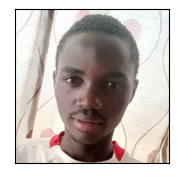

1/1 [==============================] - 1s 610ms/step
0


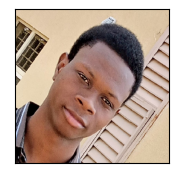

1/1 [==============================] - 1s 558ms/step
2


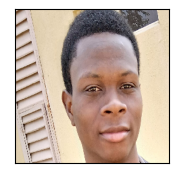

1/1 [==============================] - 1s 618ms/step
2


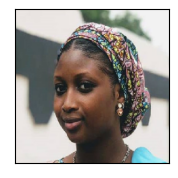

1/1 [==============================] - 1s 815ms/step
1


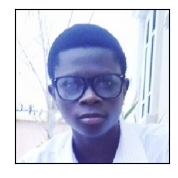

1/1 [==============================] - 1s 637ms/step
5


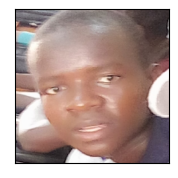

1/1 [==============================] - 1s 812ms/step
6


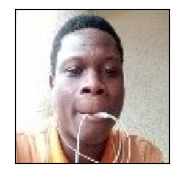

1/1 [==============================] - 1s 592ms/step
2


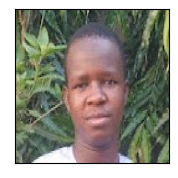

1/1 [==============================] - 1s 690ms/step
1


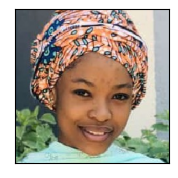

1/1 [==============================] - 1s 668ms/step
4


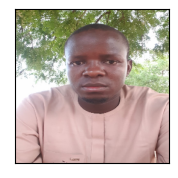

1/1 [==============================] - 1s 697ms/step
5


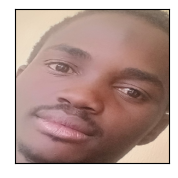

1/1 [==============================] - 1s 655ms/step
0


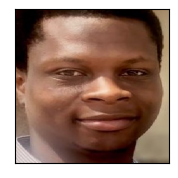

1/1 [==============================] - 1s 619ms/step
2


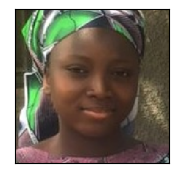

1/1 [==============================] - 1s 636ms/step
4


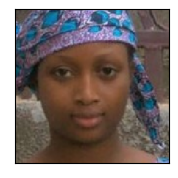

1/1 [==============================] - 1s 624ms/step
2


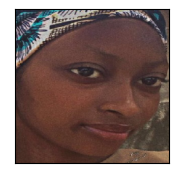

1/1 [==============================] - 1s 512ms/step
4


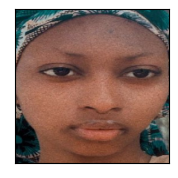

1/1 [==============================] - 1s 589ms/step
6


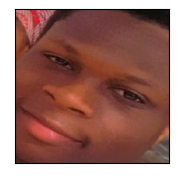

1/1 [==============================] - 1s 640ms/step
3


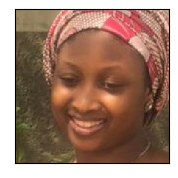

1/1 [==============================] - 1s 611ms/step
9


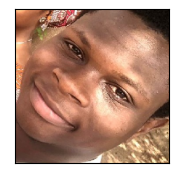

1/1 [==============================] - 1s 556ms/step
6


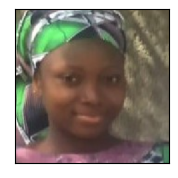

1/1 [==============================] - 1s 618ms/step
4


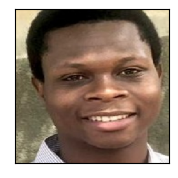

1/1 [==============================] - 1s 646ms/step
1


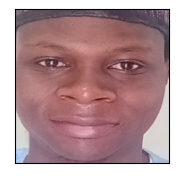

1/1 [==============================] - 1s 586ms/step
0


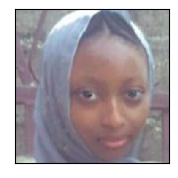

1/1 [==============================] - 1s 673ms/step
2


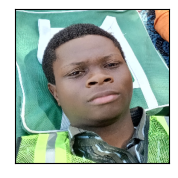

1/1 [==============================] - 1s 612ms/step
1


In [88]:
predict_image(test_dir, target_size = (255,255, 3), model = model_2)

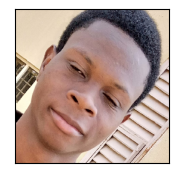

1/1 [==============================] - 1s 575ms/step
['Khaulat' 'Abubakar ' 'Al- amin' 'Female' '1/2/2005' 'hill creast' 'Sec'
 '3' 'khaulatalamin' '802891366']


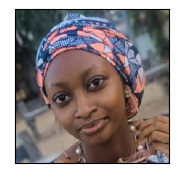

1/1 [==============================] - 1s 780ms/step
['Nuwairat' 'Abubakar ' 'Al-Amin' 'Female' '5/10/2023' 'Newgate college'
 'Medical laboratory technician' '100' 'abubakarnuwairatalamin@gmail.com'
 '8098927096']


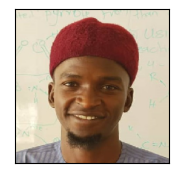

1/1 [==============================] - 1s 572ms/step
['Salim' 'Bello' 'Muhammad' 'Male' '1/9/2000' 'Gombe state University'
 'Computer science' '300' 'Saleemyoungarmy3@gmail.com' '8031232701']


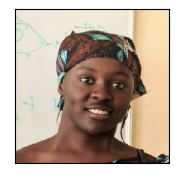

1/1 [==============================] - 1s 817ms/step
['Abubakar ' 'Abubakar ' 'Al-amin ' 'Male' '1/4/2002'
 'Gombe State University ' 'Statistics ' '300'
 'abubakaralamin100@gmail.com' '8065436818']


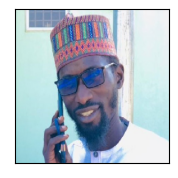

1/1 [==============================] - 1s 549ms/step
['Nuwairat' 'Abubakar ' 'Al-Amin' 'Female' '5/10/2023' 'Newgate college'
 'Medical laboratory technician' '100' 'abubakarnuwairatalamin@gmail.com'
 '8098927096']


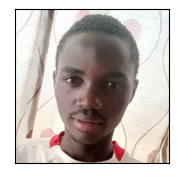

1/1 [==============================] - 1s 758ms/step
['Abubakar ' 'Abubakar ' 'Al-amin ' 'Male' '1/4/2002'
 'Gombe State University ' 'Statistics ' '300'
 'abubakaralamin100@gmail.com' '8065436818']


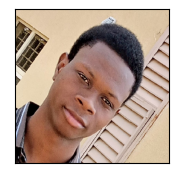

1/1 [==============================] - 1s 500ms/step
['Khaulat' 'Abubakar ' 'Al- amin' 'Female' '1/2/2005' 'hill creast' 'Sec'
 '3' 'khaulatalamin' '802891366']


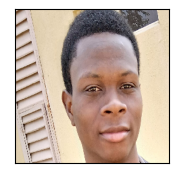

1/1 [==============================] - 1s 836ms/step
['Khaulat' 'Abubakar ' 'Al- amin' 'Female' '1/2/2005' 'hill creast' 'Sec'
 '3' 'khaulatalamin' '802891366']


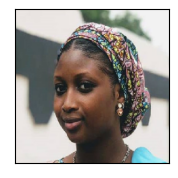

1/1 [==============================] - 1s 517ms/step
['Nuwairat' 'Abubakar ' 'Al-Amin' 'Female' '5/10/2023' 'Newgate college'
 'Medical laboratory technician' '100' 'abubakarnuwairatalamin@gmail.com'
 '8098927096']


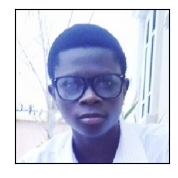

1/1 [==============================] - 1s 569ms/step
['Fatima' 'Kabir' 'Idris' 'Female' '23/05/2007' 'Haneef High School'
 'Medical laboratory technician' 'SS3' 'fateemakabeer403@gmail.com'
 '7066318666']


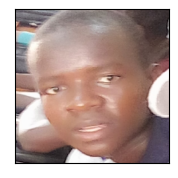

1/1 [==============================] - 1s 570ms/step
['Rachel' 'Abubakar' 'Gambo' 'Female' '23/05/2007' 'GSU' 'Statistics '
 '300' 'fateemakabeer403@gmail.com' '7066318666']


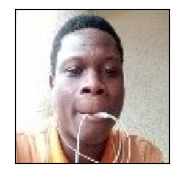

1/1 [==============================] - 1s 769ms/step
['Khaulat' 'Abubakar ' 'Al- amin' 'Female' '1/2/2005' 'hill creast' 'Sec'
 '3' 'khaulatalamin' '802891366']


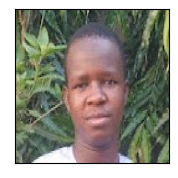

1/1 [==============================] - 1s 556ms/step
['Nuwairat' 'Abubakar ' 'Al-Amin' 'Female' '5/10/2023' 'Newgate college'
 'Medical laboratory technician' '100' 'abubakarnuwairatalamin@gmail.com'
 '8098927096']


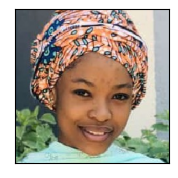

1/1 [==============================] - 1s 769ms/step
['Marryam' 'Abubakar ' 'Al-Amin' 'Female' '5/10/2004' 'Newgate college'
 'Medical laboratory technician' '200' 'abubakarmarryamalamin@gmail.com'
 '7069035483']


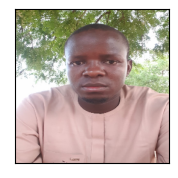

1/1 [==============================] - 1s 537ms/step
['Fatima' 'Kabir' 'Idris' 'Female' '23/05/2007' 'Haneef High School'
 'Medical laboratory technician' 'SS3' 'fateemakabeer403@gmail.com'
 '7066318666']


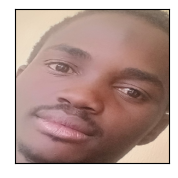

1/1 [==============================] - 1s 739ms/step
['Abubakar ' 'Abubakar ' 'Al-amin ' 'Male' '1/4/2002'
 'Gombe State University ' 'Statistics ' '300'
 'abubakaralamin100@gmail.com' '8065436818']


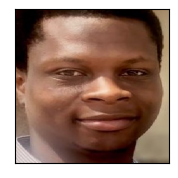

1/1 [==============================] - 1s 611ms/step
['Khaulat' 'Abubakar ' 'Al- amin' 'Female' '1/2/2005' 'hill creast' 'Sec'
 '3' 'khaulatalamin' '802891366']


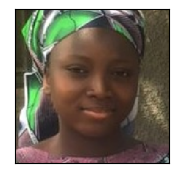

1/1 [==============================] - 1s 572ms/step
['Marryam' 'Abubakar ' 'Al-Amin' 'Female' '5/10/2004' 'Newgate college'
 'Medical laboratory technician' '200' 'abubakarmarryamalamin@gmail.com'
 '7069035483']


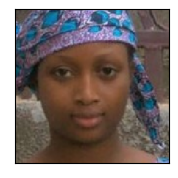

1/1 [==============================] - 1s 560ms/step
['Khaulat' 'Abubakar ' 'Al- amin' 'Female' '1/2/2005' 'hill creast' 'Sec'
 '3' 'khaulatalamin' '802891366']


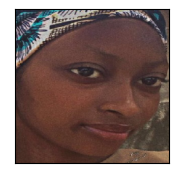

1/1 [==============================] - 1s 556ms/step
['Marryam' 'Abubakar ' 'Al-Amin' 'Female' '5/10/2004' 'Newgate college'
 'Medical laboratory technician' '200' 'abubakarmarryamalamin@gmail.com'
 '7069035483']


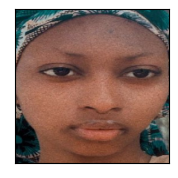

1/1 [==============================] - 1s 633ms/step
['Rachel' 'Abubakar' 'Gambo' 'Female' '23/05/2007' 'GSU' 'Statistics '
 '300' 'fateemakabeer403@gmail.com' '7066318666']


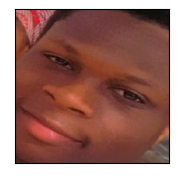

1/1 [==============================] - 1s 701ms/step
['Salim' 'Bello' 'Muhammad' 'Male' '1/9/2000' 'Gombe state University'
 'Computer science' '300' 'Saleemyoungarmy3@gmail.com' '8031232701']


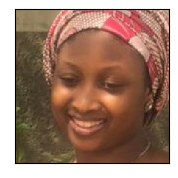

1/1 [==============================] - 1s 556ms/step
['Suhaibu' 'S' 'pira' 'Male' '19/10/1900' 'GSU' 'Statistics ' '300'
 'Piraaaa' '402656665']


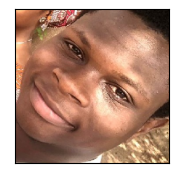

1/1 [==============================] - 1s 624ms/step
['Rachel' 'Abubakar' 'Gambo' 'Female' '23/05/2007' 'GSU' 'Statistics '
 '300' 'fateemakabeer403@gmail.com' '7066318666']


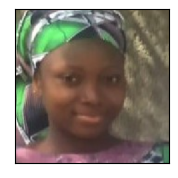

1/1 [==============================] - 1s 583ms/step
['Marryam' 'Abubakar ' 'Al-Amin' 'Female' '5/10/2004' 'Newgate college'
 'Medical laboratory technician' '200' 'abubakarmarryamalamin@gmail.com'
 '7069035483']


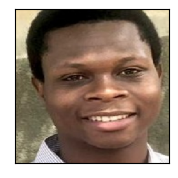

1/1 [==============================] - 1s 761ms/step
['Nuwairat' 'Abubakar ' 'Al-Amin' 'Female' '5/10/2023' 'Newgate college'
 'Medical laboratory technician' '100' 'abubakarnuwairatalamin@gmail.com'
 '8098927096']


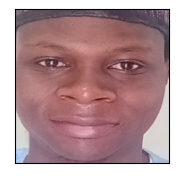

1/1 [==============================] - 1s 546ms/step
['Abubakar ' 'Abubakar ' 'Al-amin ' 'Male' '1/4/2002'
 'Gombe State University ' 'Statistics ' '300'
 'abubakaralamin100@gmail.com' '8065436818']


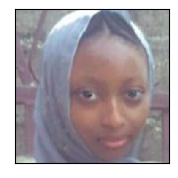

1/1 [==============================] - 1s 616ms/step
['Khaulat' 'Abubakar ' 'Al- amin' 'Female' '1/2/2005' 'hill creast' 'Sec'
 '3' 'khaulatalamin' '802891366']


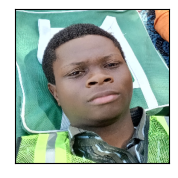

1/1 [==============================] - 1s 580ms/step
['Nuwairat' 'Abubakar ' 'Al-Amin' 'Female' '5/10/2023' 'Newgate college'
 'Medical laboratory technician' '100' 'abubakarnuwairatalamin@gmail.com'
 '8098927096']


In [98]:
predict_image(test_dir, target_size = (255,255, 3), model = model_2)

In [104]:
validation_data.class_indices

{'Abubakar Al-amin': 0,
 'Aliyu Alkasim': 1,
 'Fatima Kabir': 2,
 'Maryam Al-amin': 3,
 'Nuwairah Al-amin': 4,
 'Recheal Abubakar': 5,
 'Sadiq Gambo': 6,
 'Salim Bello': 7,
 'Shuaibu Pira': 8,
 'khaulat Al-amin': 9}

In [105]:
 train_data.class_indices

{'Abubakar Al-amin': 0,
 'Aliyu Alkasim': 1,
 'Fatima Kabir': 2,
 'Khaulat Al-amin': 3,
 'Maryam Al-amin': 4,
 'Nuwairah Al-amin': 5,
 'Recheal Abubakar': 6,
 'Sadiq Gambo': 7,
 'Salim Bello': 8,
 'Shuaibu Pira': 9}